# Lets-Plot Cheatbook

## Contents

- [Preparation](#Preparation)
  - [Imports](#Imports)
  - [Data](#Data)
- [Basics](#Basics)
- [Features](#Features)
  - [Interactive Maps](#Interactive-Maps)
  - [Interactive Plots](#Interactive-Plots)
  - [Customizable Tooltips](#Customizable-Tooltips)
  - [Formatting](#Formatting)
  - [Sampling](#Sampling)
  - [Images](#Images)
  - [Correlation Plot](#Correlation-Plot)
  - [Joint Plot](#Joint-Plot)
  - [Residual Plot](#Residual-Plot)
  - [Waterfall Plot](#Waterfall-Plot)
- [Geoms](#Geoms)
  - [Graphical Primitives](#Graphical-Primitives)
  - [One Variable](#One-Variable-1)
  - [Two Variables](#Two-Variables-1)
  - [Three Variables](#Three-Variables-1)
  - [Empty Geometry](#Empty-Geometry)
- [Stats](#Stats)
  - [Identity](#Identity)
  - [One Variable](#One-Variable-2)
  - [Two Variables](#Two-Variables-2)
  - [Three Variables](#Three-Variables-2)
- [Scales](#Scales)
  - [General Purpose Scales](#General-Purpose-Scales)
  - [X & Y Location Scales](#X-&-Y-Location-Scales)
  - [Color & Fill Scales](#Color-&-Fill-Scales)
  - [Size & Shape Scales](#Size-&-Shape-Scales)
- [Coordinate Systems](#Coordinate-Systems)
- [Position Adjustments](#Position-Adjustments)
- [Themes](#Themes)
- [Flavors](#Flavors)
- [Faceting](#Faceting)
- [Labels & Legends](#Labels-&-Legends)
- [Zooming](#Zooming)

## Preparation

### Imports

In [1]:
from io import BytesIO
import requests

import numpy as np
import pandas as pd
from PIL import Image
from scipy.stats import multivariate_normal

from lets_plot import *
from lets_plot.bistro import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



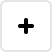
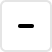
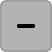
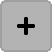
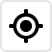
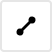
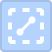
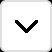
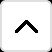
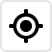
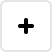
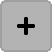
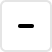
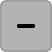
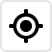
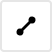
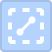
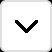
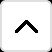
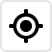

In [2]:
LetsPlot.setup_html()

### Data

In [3]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg_df.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [4]:
class_df = mpg_df.groupby('class').hwy.agg(['min', 'median', 'max', 'count']).reset_index()
class_df.head(3)

class  min  median  max  count
0  2seater   23    25.0   26      5
1  compact   23    27.0   44     47
2  midsize   23    27.0   32     41

In [5]:
fl_df = mpg_df.groupby(['cty', 'hwy']).fl.agg(pd.Series.mode).to_frame('fl').reset_index()
fl_df.head(3)

cty  hwy      fl
0    9   12       e
1   11   14  [e, p]
2   11   15       r

In [6]:
economics_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/economics.csv', parse_dates=['date'])
economics_df.head(3)

Unnamed: 0       date    pce       pop  psavert  uempmed  unemploy
0           1 1967-07-01  506.7  198712.0     12.6      4.5      2944
1           2 1967-08-01  509.8  198911.0     12.6      4.7      2945
2           3 1967-09-01  515.6  199113.0     11.9      4.6      2958

In [7]:
midwest_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')
midwest_df.head()

Unnamed: 0  PID     county state   area  poptotal   popdensity  popwhite  \
0           1  561      ADAMS    IL  0.052     66090  1270.961540     63917   
1           2  562  ALEXANDER    IL  0.014     10626   759.000000      7054   
2           3  563       BOND    IL  0.022     14991   681.409091     14477   
3           4  564      BOONE    IL  0.017     30806  1812.117650     29344   
4           5  565      BROWN    IL  0.018      5836   324.222222      5264   

   popblack  popamerindian  ...  percollege  percprof  poppovertyknown  \
0      1702             98  ...   19.631392  4.355859            63628   
1      3496             19  ...   11.243308  2.870315            10529   
2       429             35  ...   17.033819  4.488572            14235   
3       127             46  ...   17.278954  4.197800            30337   
4       547             14  ...   14.475999  3.367680             4815   

   percpovertyknown  percbelowpoverty  percchildbelowpovert  percadultpoverty  \
0         96.274777         13.151443             18.011717         11.009776   
1         99.087145         32.244278             45.826514         27.385647   
2         94.956974         12.068844             14.036061         10.852090   
3         98.477569          7.209019             11.179536          5.536013   
4         82.505140         13.520249             13.022889         11.143211   

   percelderlypoverty  inmetro  category  
0           12.443812        0       AAR  
1           25.228976        0       LHR  
2           12.697410        0       AAR  
3            6.217047        1       ALU  
4           19.200000        0       AAR  

[5 rows x 29 columns]

In [8]:
pop_df = midwest_df.groupby('state').poptotal.sum().to_frame('population').reset_index()
pop_df.head(3)

state  population
0    IL    11430602
1    IN     5544159
2    MI     9295297

In [9]:
states_df = geocode('state', pop_df.state, scope='US').get_boundaries(9)
states_df.head(3)

state found name                                           geometry
0    IL   Illinois  MULTIPOLYGON (((-89.13301 36.98200, -89.16777 ...
1    IN    Indiana  MULTIPOLYGON (((-84.81993 39.10544, -84.83405 ...
2    MI   Michigan  MULTIPOLYGON (((-90.41862 46.56636, -90.00014 ...

In [10]:
def generate_random_data(size=50, mean=[0, 0], cov=[[1, .5], [.5, 1]], seed=42):
    np.random.seed(seed)
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = multivariate_normal(mean, cov).pdf(np.dstack((X, Y)))
    return pd.DataFrame({'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()})

random_df = generate_random_data()
random_df.head(3)

x    y         z
0 -1.000000 -1.0  0.094354
1 -0.959184 -1.0  0.096849
2 -0.918367 -1.0  0.099189

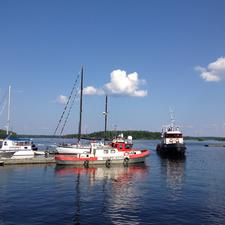

In [11]:
response = requests.get('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/source/examples/cookbook/images/fisher_boat.png')
img = Image.open(BytesIO(response.content))
img

## Basics

In [12]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='cyl')) + \
    geom_smooth(method='lm') + \
    scale_color_brewer(type='div', palette='Spectral') + \
    theme_classic() + \
    ggtitle("Simple linear smoothing")

## Features

### Interactive Maps

In [13]:
ggplot() + \
    geom_livemap() + \
    geom_map(aes(color='population', fill='population'), \
             data=pop_df, map=states_df, map_join='state', size=1, alpha=.3,
             tooltips=layer_tooltips().format('population', '.3~s')) + \
    scale_color_gradient(low='#1a9641', high='#d7191c', format='.3~s') + \
    scale_fill_gradient(low='#1a9641', high='#d7191c', format='.3~s')

### Interactive Plots

In [14]:
ggplot(mpg_df, aes(x='hwy', fill='drv')) + \
    geom_density(alpha=.5) + \
    ggtb()

### Customizable Tooltips

In [15]:
ggplot(mpg_df, aes(x='fl', fill=as_discrete('year'))) + \
    geom_bar(tooltips=layer_tooltips().line('fl|^x')
                                      .format('@year', 'd').line('@|@year')
                                      .line('count|@..count..')) + \
    scale_fill_discrete(format="d")

### Formatting

In [16]:
ggplot(economics_df, aes('date', 'unemploy')) + \
    geom_area(color='#253494', fill='#41b6c4') + \
    scale_x_datetime(format='%e %b %Y')

### Sampling

In [17]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color=as_discrete('cyl')), sampling=sampling_group_random(2, seed=42))

### Images


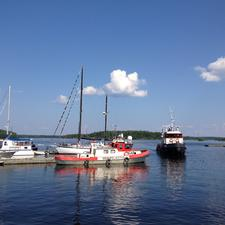

In [18]:
ggplot() + \
    geom_imshow(np.asarray(img)) + \
    theme_void()

### Correlation Plot

In [19]:
corr_plot(data=mpg_df.select_dtypes(include=np.number), threshold=.5)\
    .points().labels()\
    .palette_gradient(low='#d7191c', mid='#ffffbf', high='#1a9641')\
    .build() + \
    ggsize(400, 400)

### Joint Plot

In [20]:
joint_plot(data=mpg_df, x='cty', y='hwy')

### Residual Plot

In [21]:
residual_plot(data=mpg_df, x='cty', y='hwy', size=5, alpha=.5, color_by='drv', marginal="dens:tr")

### Waterfall Plot

In [22]:
waterfall_plot(class_df, "class", "count")

## Geoms

### Graphical Primitives

In [23]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_path()

In [24]:
ggplot() + \
    geom_polygon(data=states_df)

In [25]:
ggplot() + \
    geom_rect(xmin=0, xmax=1, ymin=0, ymax=1)

In [26]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_ribbon(aes(ymin=economics_df.unemploy - 900, ymax=economics_df.unemploy + 900))

In [27]:
ggplot() + \
    geom_band(xmin=-1, xmax=1)

#### Line Segments

In [28]:
ggplot() + \
    geom_abline(slope=.5)

In [29]:
ggplot() + \
    geom_hline(yintercept=0)

In [30]:
ggplot() + \
    geom_vline(xintercept=0)

In [31]:
ggplot() + \
    geom_segment(x=0, y=0, xend=1, yend=1, arrow=arrow())

In [32]:
ggplot() + \
    geom_curve(x=0, y=0, xend=1, yend=1, curvature=0.3, arrow=arrow())

In [33]:
ggplot() + \
    geom_spoke(x=0, y=0, angle=0.64, radius=5)

### One Variable <span style="display: none;">1</span>

#### Continuous

In [34]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_area(stat='bin')

In [35]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_density()

In [36]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_freqpoly()

In [37]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram()

In [38]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_dotplot(stackratio=.5)

In [39]:
ggplot(mpg_df, aes(sample='hwy')) + \
    geom_qq() + \
    geom_qq_line()

#### Discrete

In [40]:
ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()

In [41]:
ggplot(mpg_df) + \
    geom_pie(aes(fill='fl'))

In [42]:
ggplot() + \
    geom_function(aes(x='hwy'), data=mpg_df, fun=lambda t: t**.5)

### Two Variables <span style="display: none;">1</span>

#### Both Continuous

In [43]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()

In [44]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_smooth()

In [45]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_qq2() + \
    geom_qq2_line()

In [46]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_text(aes(label='fl'))

In [47]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(color="red", size=2) + \
    geom_text_repel(aes(label='fl'), seed=42)

In [48]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_label(aes(label='fl'))

In [49]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(color="red", size=2) + \
    geom_label_repel(aes(label='fl'), seed=42)

#### One Discrete, One Continuous

In [50]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_boxplot()

In [51]:
ggplot(mpg_df, aes('hwy', 'class')) + \
    geom_area_ridges()

In [52]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_violin()

In [53]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_sina(seed=42)

In [54]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_ydotplot(stackratio=.5)

In [55]:
ggplot(class_df, aes('class', 'count')) + \
    geom_bar(stat='identity')

#### Both Discrete

In [56]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    geom_count()

In [57]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    geom_jitter(seed=42)

#### Continuous Bivariate Distribution

In [58]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_bin2d()

In [59]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_hex()

In [60]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2d(aes(color='..group..'))

In [61]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2df(aes(fill='..group..'))

#### Continuous Function

In [62]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_area()

In [63]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_line()

In [64]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_step()

#### Visualizing Error

In [65]:
ggplot(class_df, aes(x='class')) + \
    geom_crossbar(aes(ymin='min', y='median', ymax='max'))

In [66]:
ggplot(class_df, aes(x='class')) + \
    geom_errorbar(aes(ymin='min', ymax='max'))

In [67]:
ggplot(class_df, aes(x='class')) + \
    geom_linerange(aes(ymin='min', ymax='max'))

In [68]:
ggplot(class_df, aes(x='class')) + \
    geom_pointrange(aes(ymin='min', y='median', ymax='max'))

#### Maps

In [69]:
ggplot() + \
    geom_map(data=states_df)

### Three Variables <span style="display: none;">1</span>

In [70]:
ggplot(random_df, aes('x', 'y')) + \
    geom_contour(aes(z='z'))

In [71]:
ggplot(random_df, aes('x', 'y')) + \
    geom_contourf(aes(z='z'), color='white')

In [72]:
ggplot(random_df, aes('x', 'y')) + \
    geom_raster(aes(fill='z'))

In [73]:
ggplot(random_df, aes('x', 'y')) + \
    geom_tile(aes(fill='z'))

### Empty Geometry

In [74]:
ggplot() + geom_blank()

## Stats

### Identity

In [75]:
p_bunch_1 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_bar() + \
    ggtitle("Bar geom, default stat")
p_bunch_2 = ggplot(class_df, aes('class', 'count')) + \
    geom_bar(stat='identity') + \
    ggtitle("Bar geom, identity stat")

gggrid([p_bunch_1, p_bunch_2])

### One Variable <span style="display: none;">2</span>

#### Continuous

In [76]:
ggplot(mpg_df, aes(x='hwy')) + \
    stat_ecdf()

In [77]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram() + \
    ggtitle("Histogram geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_step(aes(y='..count..'), stat='bin') + \
    ggtitle("Step geom, bin stat")

gggrid([p_bunch_1, p_bunch_2])

In [78]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density() + \
    ggtitle("Density geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_point(stat='density') + \
    ggtitle("Point geom, density stat")

gggrid([p_bunch_1, p_bunch_2])

#### Discrete

In [79]:
p_bunch_1 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar() + \
    ggtitle("Bar geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='fl')) + \
    geom_lollipop(aes(y='..count..'), stat='count') + \
    ggtitle("Lollipop geom, count stat")

gggrid([p_bunch_1, p_bunch_2])

### Two Variables <span style="display: none;">2</span>

#### Both Continuous

In [80]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    stat_summary_bin()

In [81]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_smooth() + \
    ggtitle("Smooth geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_crossbar(aes(y='hwy', ymin='..ymin..', ymax='..ymax..'), stat='smooth') + \
    ggtitle("Crossbar geom, smooth stat")

gggrid([p_bunch_1, p_bunch_2])

#### One Discrete, One Continuous

In [82]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    stat_summary()

In [83]:
p_bunch_1 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_boxplot() + \
    ylim(10, 50) + \
    ggtitle("Boxplot geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_linerange(aes(ymin='..ymin..', ymax='..ymax..'), stat='boxplot', color='black') + \
    geom_errorbar(aes(ymin='..lower..', ymax='..upper..'), stat='boxplot', width=.9) + \
    ylim(10, 50) + \
    ggtitle("Linerange and errorbar geoms, boxplot stat")

gggrid([p_bunch_1, p_bunch_2])

#### Both Discrete

In [84]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    stat_sum()

#### Continuous Bivariate Distribution

In [85]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_bin2d() + \
    ggtitle("Bin2d geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='..count..'), stat='bin2d') + \
    ggtitle("Point geom, bin2d stat")

gggrid([p_bunch_1, p_bunch_2])

In [86]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_hex() + \
    ggtitle("Hex geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='..count..'), stat='binhex') + \
    ggtitle("Point geom, binhex stat")

gggrid([p_bunch_1, p_bunch_2])

In [87]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2d(aes(color='..group..')) + \
    ggtitle("Density2d geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_tile(aes(color='..group..'), stat='density2d', size=.5) + \
    ggtitle("Tile geom, density2d stat")

gggrid([p_bunch_1, p_bunch_2])

### Three Variables <span style="display: none;">2</span>

In [88]:
p_bunch_1 = ggplot(random_df, aes('x', 'y')) + \
    geom_contour(aes(z='z')) + \
    ggtitle("Contour geom, default stat")
p_bunch_2 = ggplot(random_df, aes('x', 'y')) + \
    geom_path(aes(z='z'), stat='contour') + \
    ggtitle("Path geom, contour stat")

gggrid([p_bunch_1, p_bunch_2])

## Scales

### General Purpose Scales

In [89]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_continuous() + \
    ggtitle("Bar geom, continuous fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [90]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_discrete(guide='none') + \
    ggtitle("Histogram geom, discrete fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [91]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(alpha='fl'), color='#0c2c84', fill='#0c2c84')
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default alpha scale")
p_bunch_2 = p_common + \
    scale_alpha_manual(values=[.4, .1, .8, .85, .9]) + \
    ggtitle("Bar geom, manual alpha scale")

gggrid([p_bunch_1, p_bunch_2])

In [92]:
p_common = ggplot(economics_df, aes('date', 'unemploy')) + \
    scale_x_datetime() + \
    geom_point(aes(size='psavert'), shape=21, alpha=.3, show_legend=False)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size_identity() + \
    ggtitle("Point geom, identity size scale")

gggrid([p_bunch_1, p_bunch_2])

### X & Y Location Scales

In [93]:
breaks = [economics_df.date.min(), economics_df.date.median(), economics_df.date.max()]
labels = [str(date).split('-')[0] for date in breaks]
p_common = ggplot(economics_df, aes('date', 'pce')) + geom_line()
p_bunch_1 = p_common + \
    ggtitle("Line geom, default x scale")
p_bunch_2 = p_common + \
    scale_x_datetime() + \
    ggtitle("Line geom, datetime x scale")
p_bunch_3 = p_common + \
    scale_x_time(breaks=breaks, labels=labels) + \
    ggtitle("Line geom, time x scale")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])

In [94]:
p_common = ggplot(midwest_df, aes('state', 'poptotal')) + \
    geom_jitter(aes(color='state'), seed=42) + \
    coord_flip()
p_bunch_1 = p_common + \
    ggtitle("Jitter geom, default y scale")
p_bunch_2 = p_common + \
    scale_y_log10() + \
    ggtitle("Jitter geom, log10 y scale")

gggrid([p_bunch_1, p_bunch_2])

In [95]:
p_common = ggplot(economics_df, aes('date', 'pce')) + \
    geom_line()
p_bunch_1 = p_common + \
    ggtitle("Line geom, default x scale")
p_bunch_2 = p_common + \
    scale_x_reverse() + \
    ggtitle("Line geom, reversed x scale")

gggrid([p_bunch_1, p_bunch_2])

### Color & Fill Scales

#### Continuous

In [96]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_grey() + \
    ggtitle("Histogram geom, grey fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [97]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_gradient(low='#006d2c', high='#edf8e9') + \
    ggtitle("Histogram geom, gradient fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [98]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_brewer(type='seq', palette='GnBu', direction=-1) + \
    ggtitle("Histogram geom, brewer fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [99]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_viridis(option='inferno') + \
    ggtitle("Histogram geom, viridis fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [100]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_hue(l=80, c=150) + \
    ggtitle("Histogram geom, hue fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [101]:
p_common = ggplot(random_df, aes('x', 'y')) + \
    geom_histogram(aes(fill='x'), bins=7)
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_gradient2(low='#4575b4', mid='#ffffbf', high='#d73027') + \
    ggtitle("Histogram geom, gradient2 fill scale")

gggrid([p_bunch_1, p_bunch_2])

#### Discrete

In [102]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_brewer(type='qual', palette='Dark2') + \
    ggtitle("Bar geom, brewer fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [103]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_manual(values=['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']) + \
    ggtitle("Bar geom, manual fill scale")

gggrid([p_bunch_1, p_bunch_2])

### Size & Shape Scales

In [104]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(size='cyl'), shape=21, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size_area() + \
    ggtitle("Point geom, area size scale")

gggrid([p_bunch_1, p_bunch_2])

In [105]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(size='cyl'), shape=21, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size(range=[3, 6]) + \
    ggtitle("Point geom, size scale in range 3..6")

gggrid([p_bunch_1, p_bunch_2])

In [106]:
p_common = ggplot(mpg_df[mpg_df["fl"] == "p"], aes('hwy', 'cty')) + \
    geom_lollipop(aes(linewidth='cyl'), slope=.7, intercept=.8, dir='s') + \
    coord_fixed()
p_bunch_1 = p_common + \
    ggtitle("Lollipop geom, default linewidth scale")
p_bunch_2 = p_common + \
    scale_linewidth(range=[.5, 2]) + \
    ggtitle("Lollipop geom, scaled linewidth")

gggrid([p_bunch_1, p_bunch_2])

In [107]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(stroke='cyl'), shape=1, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default stroke scale")
p_bunch_2 = p_common + \
    scale_stroke(range=[.5, 2]) + \
    ggtitle("Point geom, scaled stroke")

gggrid([p_bunch_1, p_bunch_2])

In [108]:
p_common = ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(aes(shape='fl'))
p_bunch_1 = p_common + \
    ggtitle("Point geom, default shape scale")
p_bunch_2 = p_common + \
    scale_shape(solid=False) + \
    ggtitle("Point geom, shape scale with solid=False")

gggrid([p_bunch_1, p_bunch_2])

In [109]:
p_common = ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(aes(shape='fl'))
p_bunch_1 = p_common + \
    ggtitle("Point geom, default shape scale")
p_bunch_2 = p_common + \
    scale_shape_manual(values=[0, 12, 1, 10, 3, 13, 2, 4]) + \
    ggtitle("Point geom, manual shape scale")

gggrid([p_bunch_1, p_bunch_2])

## Coordinate Systems

In [110]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_cartesian(ylim=[0, 250]) + \
    ggtitle("Bar geom, cartesian coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [111]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Point geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_polar() + \
    ggtitle("Point geom, polar coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [112]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Point geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_fixed() + \
    ggtitle("Point geom, fixed coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [113]:
p_common = ggplot() + \
    geom_polygon(data=states_df)
p_bunch_1 = p_common + \
    ggtitle("Polygon geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_map() + \
    ggtitle("Polygon geom, map coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [114]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_flip() + \
    ggtitle("Bar geom, flipped coordinates")

gggrid([p_bunch_1, p_bunch_2])

## Position Adjustments

In [115]:
p_bunch_1 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='drv')) + \
    ggtitle("Bar geom, default position")
p_bunch_2 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='drv'), position='dodge') + \
    ggtitle("Bar geom, dodge position")

gggrid([p_bunch_1, p_bunch_2])

In [116]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black") + \
    ggtitle("Density geom, default position")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black", position='stack') + \
    ggtitle("Density geom, stack position")
p_bunch_3 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black", position='fill') + \
    ggtitle("Density geom, fill position")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])

In [117]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    ggtitle("Point geom, default position")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(position=position_jitter(seed=42)) + \
    ggtitle("Point geom, jitter position")

gggrid([p_bunch_1, p_bunch_2])

In [118]:
p_common = ggplot(mpg_df, aes('cyl', 'hwy', fill='drv'))
p_bunch_1 = p_common + \
    geom_boxplot() + \
    geom_point(color='black', shape=21) + \
    ggtitle("Point geom, default position")
p_bunch_2 = p_common + \
    geom_boxplot() + \
    geom_point(position=position_jitterdodge(seed=42), \
               color='black', shape=21) + \
    ggtitle("Point geom, jitterdodge position")

gggrid([p_bunch_1, p_bunch_2])

In [119]:
p_common = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_bar()
p_bunch_1 = p_common + \
    geom_text(aes(label='..count..'), stat='count') + \
    ggtitle("Text geom, default position")
p_bunch_2 = p_common + \
    geom_text(aes(label='..count..'), stat='count', color='white', \
              position=position_nudge(y=-2.5)) + \
    ggtitle("Text geom, nudge position")

gggrid([p_bunch_1, p_bunch_2])

## Themes

In [120]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch = []
p_bunch.append(p_common + ggtitle("Default theme"))
p_bunch.append(p_common + theme_none() + ggtitle("Empty theme"))
p_bunch.append(p_common + theme_void() + ggtitle("Void theme"))
p_bunch.append(p_common + theme_minimal() + ggtitle("Minimalistic theme"))
p_bunch.append(p_common + theme_classic() + ggtitle("Classic theme"))
p_bunch.append(p_common + theme_grey() + ggtitle("Grey theme"))
p_bunch.append(p_common + theme_light() + ggtitle("Light theme"))
p_bunch.append(p_common + theme_bw() + ggtitle("Dark-on-light theme"))

gggrid(p_bunch, ncol=2)

In [121]:
background_color_light = '#ffffe5'
main_color_dark = '#00441b'
main_color_normal = '#238b45'
main_color_light = '#f7fcf5'

custom_theme = theme(
    line=element_line(color=main_color_normal, size=2),
    rect=element_rect(color=main_color_normal, fill=main_color_light, size=2),
    text=element_text(color=main_color_dark, family="Courier", face="bold"),
    geom=element_geom(pen=main_color_normal),
    axis_ontop=True,
    axis_ticks=element_line(color=main_color_normal, size=1),
    axis_ticks_length=7,
    legend_background=element_rect(size=1),
    legend_position='bottom',
    panel_grid_major=element_line(color=main_color_normal, size=.5),
    panel_grid_minor='blank',
    plot_background=element_rect(fill=background_color_light, size=1),
    axis_tooltip=element_rect(color=main_color_dark)
)

ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    theme_none() + \
    custom_theme + \
    ggtitle("Custom theme")

## Flavors

In [122]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    theme_grey()
p_bunch = []
p_bunch.append(p_common + ggtitle("Without flavor"))
p_bunch.append(p_common + flavor_darcula() + ggtitle("flavor_darcula()"))
p_bunch.append(p_common + flavor_solarized_light() + ggtitle("flavor_solarized_light()"))
p_bunch.append(p_common + flavor_solarized_dark() + ggtitle("flavor_solarized_dark()"))
p_bunch.append(p_common + flavor_high_contrast_light() + ggtitle("flavor_high_contrast_light()"))
p_bunch.append(p_common + flavor_high_contrast_dark() + ggtitle("flavor_high_contrast_dark()"))

gggrid(p_bunch, ncol=2)

## Faceting

In [123]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    facet_grid(x='fl', y='year')

In [124]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    facet_wrap(facets='fl', ncol=3)

## Labels & Legends

In [125]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    labs(x='City miles per gallon', y='Highway miles per gallon') + \
    ggtitle("Use labs()")

gggrid([p_bunch_1, p_bunch_2])

In [126]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    xlab('City miles per gallon') + \
    ylab('Highway miles per gallon') + \
    ggtitle("Use xlab() and ylab()")

gggrid([p_bunch_1, p_bunch_2])

In [127]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    theme(legend_position='top') + \
    ggtitle("Use legend_position='top'")

gggrid([p_bunch_1, p_bunch_2])

In [128]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_color_gradient(
        guide=guide_colorbar(nbin=40, barwidth=10, barheight=200)
    ) + \
    ggtitle("Use guide_colorbar()")

gggrid([p_bunch_1, p_bunch_2])

In [129]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='manufacturer')) + \
    theme(legend_position='bottom')
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_fill_discrete(guide=guide_legend(nrow=3)) + \
    ggtitle("Use guide_legend()")

gggrid([p_bunch_1, p_bunch_2])

## Zooming

In [130]:
p_common = ggplot() + \
    geom_map(data=states_df) + \
    theme_classic()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_x_continuous(limits=[-92, -82]) + \
    ylim(36, 43) + \
    ggtitle("Zoom with clipping")
p_bunch_3 = p_common + \
    coord_map(xlim=[-92, -82], ylim=[36, 43]) + \
    ggtitle("Zoom without clipping")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])